In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [2]:
data = []
labels = []
classes = 43

cur_path = os.getcwd()

#Retrieving the images and their labels 

for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [3]:
#Converting lists into numpy arrays

data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

#Splitting training and testing dataset

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [6]:
#Building the model

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [7]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))
model.save("trafficSignModel.h5")


Epoch 1/15
491/491 [==============================] - 36s 73ms/step - loss: 3.8534 - accuracy: 0.2624 - val_loss: 0.4267 - val_accuracy: 0.8993
Epoch 2/15
491/491 [==============================] - 37s 74ms/step - loss: 0.7745 - accuracy: 0.7769 - val_loss: 0.1518 - val_accuracy: 0.9649
Epoch 3/15
491/491 [==============================] - 36s 73ms/step - loss: 0.3868 - accuracy: 0.8906 - val_loss: 0.1110 - val_accuracy: 0.9704
Epoch 4/15
491/491 [==============================] - 36s 74ms/step - loss: 0.2822 - accuracy: 0.9200 - val_loss: 0.0778 - val_accuracy: 0.9824
Epoch 5/15
491/491 [==============================] - 38s 77ms/step - loss: 0.2573 - accuracy: 0.9295 - val_loss: 0.0771 - val_accuracy: 0.9813
Epoch 6/15
491/491 [==============================] - 38s 77ms/step - loss: 0.1963 - accuracy: 0.9463 - val_loss: 0.0429 - val_accuracy: 0.9898
Epoch 7/15
491/491 [==============================] - 36s 74ms/step - loss: 0.1843 - accuracy: 0.9530 - val_loss: 0.0590 - val_accuracy:

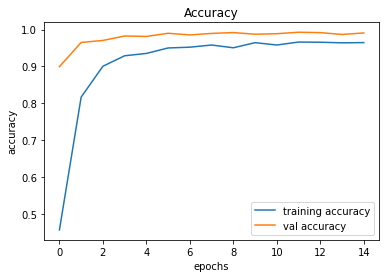

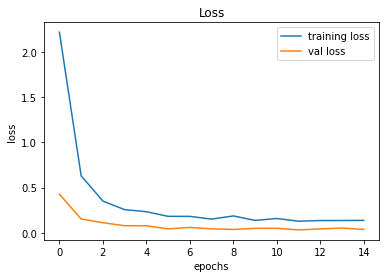

In [8]:
#plotting graphs for accuracy 

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [12]:
#testing accuracy on test dataset

from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    
X_test=np.array(data)
pred = model.predict_classes(X_test)

#Accuracy with the test data

from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

C:\Users\DEBJYOTI\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9660332541567695
